In [5]:
#program1 findS
import csv 
with open('prg1.csv','r') as f :
    reader = csv.reader(f)
    your_list = list(reader)
h = [['0','0','0','0','0','0']]
for i in your_list :    
    print(i)    
    if i[-1] == "yes":
        j = 0
        for x in i:
            if x != "yes":
                if x != h[0][j] and h[0][j] == '0':
                    h[0][j] = x
                elif x != h[0][j] and h[0][j] != '0':
                    h[0][j] = '?'
                else:
                    pass                
                j = j + 1
print("most specfic hypothesis is")    
print (h)

['sunny', 'warm', 'normal', 'strong', 'warm', 'same', 'yes']
['sunny', 'warm', 'high', 'strong', 'warm', 'same', 'yes']
['rainy', 'cold', 'high', 'strong', 'warm', 'change', 'no']
['sunny', 'warm', 'high', 'strong', 'cool', 'change', 'yes']
most specfic hypothesis is
[['sunny', 'warm', '?', 'strong', '?', '?']]


In [7]:
#program2 candidate elimination
f = open('prg2.csv','r')
lst = f.readline().split(',')
length=len(lst)
f.close();

f = open('prg2.csv','r')
count=1
shypo=['0']*(length-1)
ghypo=['?']*(length-1)
print("Intial Specific Hypothesis is = ",shypo)
print("Intial General Hypothesis is = ",ghypo)

for value in f:
    lst = value.split(',')
    if(lst[length-1] == "yes\n"):
        for i in range(0, length-1):
            if(shypo[i]!=lst[i] and shypo[i]!='0'):
                shypo[i]='?'
            else:
                shypo[i]=lst[i]
    elif(lst[length-1] == "no\n"):
        ghypo.clear()
        for i in range(0,length-1):
            if('0' in shypo):
                temp_list = ['?']*i
                temp_list = temp_list + [lst[i]]
                temp_list = temp_list + (['?']*(length-2-i))
                ghypo.append(temp_list)
            elif(shypo[i]!=lst[i] and shypo[i]!='?'):
                temp_list = ['?']*i
                temp_list = temp_list + [shypo[i]]
                temp_list = temp_list + (['?']*(length-2-i))
                if(temp_list not in ghypo):
                    ghypo.append(temp_list)
    print("S Hypothesis after row ", count ," = ",shypo )
    print("G Hypothesis after row ", count ," = ",ghypo )
    count=count+1

temp_ghypo=list()
for i in range (len(ghypo)):
    for j in range(len(ghypo[i])):
        if(ghypo[i][j]!='?' and ghypo[i][j] == shypo[j]):
            temp_ghypo.append(ghypo[i])

print("Final SHypothesis ",shypo )
print("Final GHypothesis ",temp_ghypo )
f.close()

Intial Specific Hypothesis is =  ['0', '0', '0', '0', '0', '0']
Intial General Hypothesis is =  ['?', '?', '?', '?', '?', '?']
S Hypothesis after row  1  =  ['sunny', 'warm', 'normal', 'strong', 'warm', 'same']
G Hypothesis after row  1  =  ['?', '?', '?', '?', '?', '?']
S Hypothesis after row  2  =  ['sunny', 'warm', '?', 'strong', 'warm', 'same']
G Hypothesis after row  2  =  ['?', '?', '?', '?', '?', '?']
S Hypothesis after row  3  =  ['sunny', 'warm', '?', 'strong', 'warm', 'same']
G Hypothesis after row  3  =  [['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', 'same']]
S Hypothesis after row  4  =  ['sunny', 'warm', '?', 'strong', '?', '?']
G Hypothesis after row  4  =  [['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', 'same']]
Final SHypothesis  ['sunny', 'warm', '?', 'strong', '?', '?']
Final GHypothesis  [['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?']]


In [10]:
#program3 decision tree
import pandas as pd
import numpy as np

dataset = pd.read_csv('PlayTennis.csv')
def entropy(target_col):
    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts))for i in range(len(elements))])
    return entropy
def InfoGain(data,feature,tname):
    te = entropy(data[tname])
    vals,counts= np.unique(data[feature],return_counts=True)
    we = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[feature]==vals[i]).dropna() [tname]) for i in range(len(vals))]) 
    Information_Gain = te - we
    return Information_Gain
f=['Outlook','Temperature','Humidity','Wind']
tname="PlayTennis"
def ID3(data,f,tname):
    if len(np.unique(data[tname])) == 1:
        return np.unique(data[tname])[0]
    else:
        item_values = [InfoGain(data,feature,tname) for feature in f]
        bfi= np.argmax(item_values)
        bf = f[bfi]
        tree = {bf:{}}
        f = [i for i in f if i != bf]
        for value in np.unique(data[bf]):
            sub_data = data.where(data[bf] == value).dropna()
            subtree = ID3(sub_data,f,tname)
            tree[bf][value] = subtree
    return(tree)

tree=ID3(dataset,f,tname)
print("The Decision Tree is:\n",tree)
query = dataset.iloc[:,:].to_dict(orient="records")
def predict(query,tree):
    for key in list(query.keys()):
        if key in list(tree.keys()):
            try:
                result = tree[key][query[key]]
            except:
                return default
            if isinstance(result,dict):
                return predict(query,result)
            else:
                return result

result=predict(query[12],tree)
print("\n\nTesting sample 1:\n",query[12],"PREDICTED =>",result)
result=predict(query[13],tree)
print("\nTesting sample 2:\n",query[13],"PREDICTED =>",result)

The Decision Tree is:
 {'Outlook': {'Overcast': 'Yes', 'Rain': {'Wind': {'Strong': 'No', 'Weak': 'Yes'}}, 'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}}}


Testing sample 1:
 {'Outlook': 'Overcast', 'Temperature': 'Hot', 'Humidity': 'Normal', 'Wind': 'Weak', 'PlayTennis': 'Yes'} PREDICTED => Yes

Testing sample 2:
 {'Outlook': 'Rain', 'Temperature': 'Mild', 'Humidity': 'High', 'Wind': 'Strong', 'PlayTennis': 'No'} PREDICTED => No


In [11]:
#program4 back propagation
import numpy as np # numpy is commonly used to process number array
X = np.array([[2,9], [3,6], [4,8]]) # Features ( Hrs Slept, Hrs Studied)
y = np.array([[92], [86], [89]]) # Labels(Marks obtained)
X = X/np.amax(X,axis=0) # Normalize
y = y/100
def sigmoid(x):
    return 1/(1 + np.exp(-x))
def sigmoid_grad(x):
    return x * (1 - x)
# Variable initialization
epoch=1000 #Setting training iterations
eta =0.1 #Setting learning rate (eta)
input_neurons = 2 #number of features in data set
hidden_neurons = 3 #number of hidden layers neurons
output_neurons = 1 #number of neurons at output layer
# Weight and bias - Random initialization
wh=np.random.uniform(size=(input_neurons,hidden_neurons)) # 2x3
bh=np.random.uniform(size=(1,hidden_neurons)) # 1x3
wout=np.random.uniform(size=(hidden_neurons,output_neurons)) # 1x1
bout=np.random.uniform(size=(1,output_neurons))
for i in range(epoch):
    #Forward Propogation
    h_ip=np.dot(X,wh) + bh # Dot product + bias
    h_act = sigmoid(h_ip) # Activation function
    o_ip=np.dot(h_act,wout) + bout
    output = sigmoid(o_ip)
    # Error at Output layer
    Eo = y-output # Error at o/p
    outgrad = sigmoid_grad(output)
    d_output = Eo* outgrad # Errj=Oj(1-Oj)(Tj-Oj)
    # Error at Hidden later
    Eh = np.dot(d_output,wout.T) # .T means transpose
    hiddengrad = sigmoid_grad(h_act) # How much hidden layer wts contributed to error
    d_hidden = Eh * hiddengrad
    
    wout += np.dot(h_act.T,d_output) *eta # Dotproduct of nextlayererror and currentlayerop
    wh += np.dot(X.T,d_hidden) *eta

print("Normalized Input: \n" ,X)
print("Actual Output: \n" ,y)
print("Predicted Output: \n" ,output)


Normalized Input: 
 [[0.5        1.        ]
 [0.75       0.66666667]
 [1.         0.88888889]]
Actual Output: 
 [[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.88929567]
 [0.88824022]
 [0.89304973]]


In [13]:
#program5 Naive bayesion classifier
import pandas as pd
mush = pd.read_csv('mushrooms.csv')
target = 'class'
classes = mush[target].unique()
features = mush.columns[mush.columns!=target]
testData = mush.sample(frac=0.3)
mush.drop(testData.index,inplace = True)
first ={}
fourth ={}
for x in classes:
    mushcl = mush[mush[target]==x][features]
    tot = len(mushcl)
    second={}
    for col in mushcl.columns:
        third={}
        for val,cnt in mushcl[col].value_counts().iteritems():
            prob = cnt/tot
            third[val]=prob
            second[col]=third
    first[x]=second
    fourth[x]=len(mushcl)/len(mush)
def proabs(params):
    proab={}
    for x in classes:
        calc = fourth[x]
        for col, val in params.iteritems():
            try:
                calc = first[x][col][val]
            except KeyError:
                calc =0
        proab[x]=calc
    return proab
def maxx(params):
    proab = proabs(params)
    maxcl =''; maxv=0
    for col,val in proab.items():
        if(val>maxv):
            maxv=val
            maxcl=col
    return maxcl

b=[]
for i in mush.index:
    b.append(   maxx(mush.loc[i,features]) == mush.loc[i,target]
            )
print(sum(b),'correct of',len(b))
print('Accuracy =',sum(b)/len(b))
b=[]
for i in testData.index:
    b.append(   maxx(testData.loc[i,features]) == testData.loc[i,target]
            )
print(sum(b),'correct of',len(b))
print('Accuracy =',sum(b)/len(b))

3918 correct of 5687
Accuracy = 0.688939687005451
1690 correct of 2437
Accuracy = 0.6934755847353303


In [15]:
#Program6 Naive Bayesian Classifier
import pandas as pd
msg=pd.read_csv('naive.csv',names=['message','label'])
print('The dimensions of the dataset',msg.shape)
msg['labelnum']=msg.label.map({'pos':1,'neg':0})
X=msg.message
y=msg.labelnum
print(X)
print(y)
#splitting the dataset into train and test data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y)
print(xtest.shape)
print(xtrain.shape)
print(ytest.shape)
print(ytrain.shape)
#output of count vectoriser is a sparse matrix
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
xtrain_dtm = count_vect.fit_transform(xtrain)
xtest_dtm=count_vect.transform(xtest)
print(count_vect.get_feature_names())

df=pd.DataFrame(xtrain_dtm.toarray(),columns=count_vect.get_feature_names())
print(df)#tabular representation
print(xtrain_dtm) #sparse matrix representation
# Training Naive Bayes (NB) classifier on training data.
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(xtrain_dtm,ytrain)
predicted = clf.predict(xtest_dtm)
#printing accuracy metrics
from sklearn import metrics
print('Accuracy metrics')
print('Accuracy of the classifer is',metrics.accuracy_score(ytest,predicted))
print('Confusion matrix')
print(metrics.confusion_matrix(ytest,predicted))
print('Recall and Precison ')
print(metrics.recall_score(ytest,predicted))
print(metrics.precision_score(ytest,predicted))

The dimensions of the dataset (18, 2)
0                      I love this sandwich
1                  This is an amazing place
2        I feel very good about these beers
3                      This is my best work
4                      What an awesome view
5             I do not like this restaurant
6                  I am tired of this stuff
7                    I can't deal with this
8                      He is my sworn enemy
9                       My boss is horrible
10                 This is an awesome place
11    I do not like the taste of this juice
12                          I love to dance
13        I am sick and tired of this place
14                     What a great holiday
15           That is a bad locality to stay
16           We will have good fun tomorrow
17         I went to my enemy's house today
Name: message, dtype: object
0     1
1     1
2     1
3     1
4     1
5     0
6     0
7     0
8     0
9     0
10    1
11    0
12    1
13    0
14    1
15    0
16    1
17   

In [ ]:
#programs7 BayesianNetwork
import pandas as pd
from pgmpy.estimators import BayesianEstimator
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
f=open('data7_name.csv','r')
attributes= f.readline().split(',')
heartDisease=pd.read_csv('data7.csv',names=attributes)
print("\nAttributes and datatypes")
print(heartDisease.dtypes)
model=BayesianModel([('age','trestbps'),('age','fbs'),('sex','trestbps'),('exang','trestbps'),
('trestbps','heartdisease'),('fbs','heartdisease')])
model.fit(heartDisease,BayesianEstimator)
HeartDisease_infer=VariableElimination(model)
print("\n 1. Probability heart disease given age=28")
q=HeartDisease_infer.query(['heartdisease'],{'age':28})
print(q['heartdisease'])
print("\n 2. Probability of heart disease for male")
q=HeartDisease_infer.query(['heartdisease'],{'sex':1})
print(q['heartdisease'])

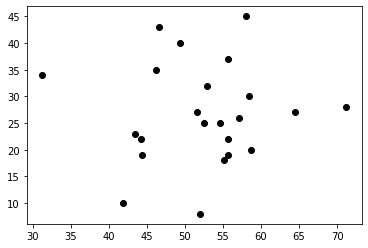

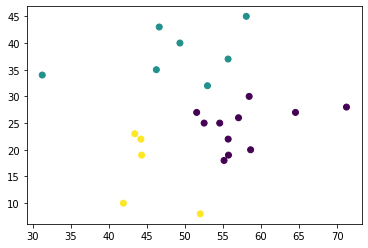

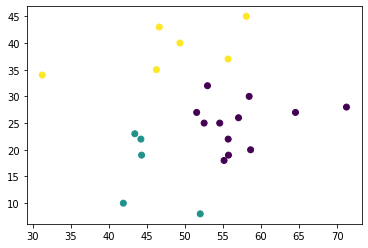

In [18]:
#program 8 kmeans
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('8-kmeansdata.csv')
f1 =data['Distance_Feature']
f2=data['Speeding_Feature']
X =np.array(list(zip(f1,f2)))
plt.scatter(f1,f2,color='black')
plt.show()
kmeans = KMeans(3).fit(X)
labels = kmeans.predict(X)
plt.scatter(f1,f2,c=labels)
plt.show()
gm = GaussianMixture(3).fit(X)
labels = gm.predict(X)
plt.scatter(f1,f2,c=labels)
plt.show()

In [19]:
#PROGRAM 9 KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
iris=datasets.load_iris()
print("Iris Data set loaded...")
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target)
classifier = KNeighborsClassifier(3).fit(x_train, y_train)
y_pred=classifier.predict(x_test)
print("Results of Classification using K-nn with K=1 ")
for r in range(0,len(x_test)):
    print(" Sample:", str(x_test[r]), " Actual-label:", str(y_test[r]), " Predicted-label:",str(y_pred[r]))
print("Classification Accuracy :" , classifier.score(x_test,y_test));

Iris Data set loaded...
Results of Classification using K-nn with K=1 
 Sample: [5.1 3.3 1.7 0.5]  Actual-label: 0  Predicted-label: 0
 Sample: [5.1 3.4 1.5 0.2]  Actual-label: 0  Predicted-label: 0
 Sample: [5.1 3.8 1.6 0.2]  Actual-label: 0  Predicted-label: 0
 Sample: [5.  3.4 1.6 0.4]  Actual-label: 0  Predicted-label: 0
 Sample: [5.1 3.7 1.5 0.4]  Actual-label: 0  Predicted-label: 0
 Sample: [4.6 3.2 1.4 0.2]  Actual-label: 0  Predicted-label: 0
 Sample: [6.9 3.1 4.9 1.5]  Actual-label: 1  Predicted-label: 1
 Sample: [6.7 3.3 5.7 2.5]  Actual-label: 2  Predicted-label: 2
 Sample: [5.  3.3 1.4 0.2]  Actual-label: 0  Predicted-label: 0
 Sample: [4.9 2.5 4.5 1.7]  Actual-label: 2  Predicted-label: 1
 Sample: [6.8 2.8 4.8 1.4]  Actual-label: 1  Predicted-label: 1
 Sample: [5.9 3.2 4.8 1.8]  Actual-label: 1  Predicted-label: 2
 Sample: [5.8 2.7 5.1 1.9]  Actual-label: 2  Predicted-label: 2
 Sample: [6.5 3.  5.8 2.2]  Actual-label: 2  Predicted-label: 2
 Sample: [5.5 2.4 3.8 1.1]  Actua

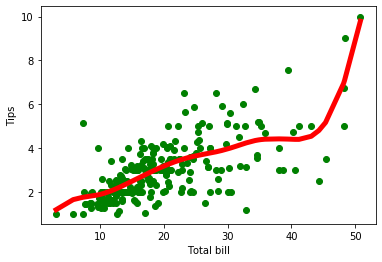

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
def localWeigh(point,X,ymat,k):
    m,n = np.shape(X)
    weights = np.mat(np.eye(m))
    for i in range(m):
        diff = point - X[i]
        weights[i,i] = np.exp(diff*diff.T/(-2.0*k**2))
    W = (X.T *(weights*X)).I * (X.T*(weights*ymat.T))
    return W
def localWeightReg(X,ymat,k):
    m,n = np.shape(X)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = X[i] * localWeigh(X[i],X,ymat,k)
    return ypred
def plott(X,pred):
    sortIndex = X[:,1].argsort(0)
    xsort = X[sortIndex][:,0][:,1]
    ysort = pred[sortIndex]
    plt.scatter(x,y,color='green')
    plt.plot(xsort,ysort,color="red",linewidth=5)
    plt.xlabel('Total bill')
    plt.ylabel('Tips')
    plt.show()

data = pd.read_csv('data10.csv')
x=data['total_bill']
y = data['tip']
xmat = np.mat(x)
ymat = np.mat(y)
size = np.shape(xmat)[1]
ones = np.mat(np.ones(size))
X=np.hstack((ones.T,xmat.T))
pred = localWeightReg(X,ymat,3)
plott(X,pred)